In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [29]:
plt.style.use('ggplot')

# 1. Salary

## 1.1 
Предположим, что размер оклада зависит от опыта работы по формуле $\large salary_{c.u.} = (experience_{years} + 25) * 1000 $  
*(c.u. == conventional units == у.е.)

Постройте график зависимости размера зарплаты от опыта работы (опыт взять от 0 до 20 лет).
- Создайте вектор с размером опыта (сделайте шаг меньше, чем 1 год)  
- Создайте вектор с размером зарплаты  
- Постройте график  
- Добавьте адекватные подписи к осям и название графика

In [30]:
experience = np.arange(0, 21, 0.1)
salary = (experience + 25) * 1000
# salary = salary + salary ** 4

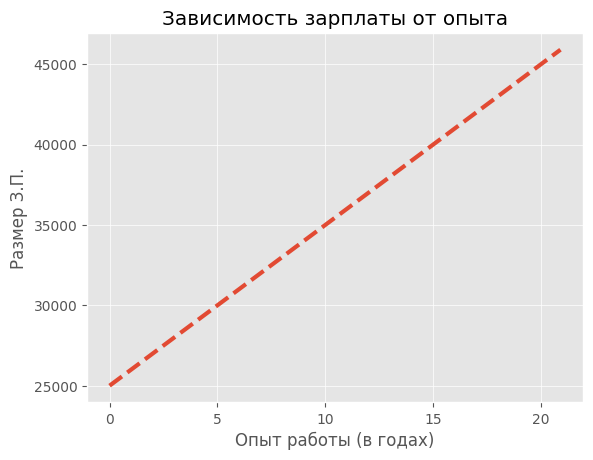

In [31]:
plt.plot(experience, salary, linewidth=3, linestyle='--')

plt.xlabel('Опыт работы (в годах)')
plt.ylabel('Размер З.П.')
plt.title('Зависимость зарплаты от опыта')

plt.show()

## 1.2 
Для полученных векторов посчитайте коэффициент корреляции Пирсона (воспользуйтесь `pearsonr` из `scipy.stats`)

In [32]:
from scipy.stats import pearsonr

In [33]:
corr = pearsonr(experience, salary)
corr

PearsonRResult(statistic=1.0, pvalue=0.0)

In [34]:
corr.statistic

1.0

## 1.3 
На полученный в пункте 1.1 график добавьте значение коэффициенты корреляции куда-то в свободное место (т.е. просто повторите график и добавьте в него коэф. с помощью `plt.text` или plt.annotate)

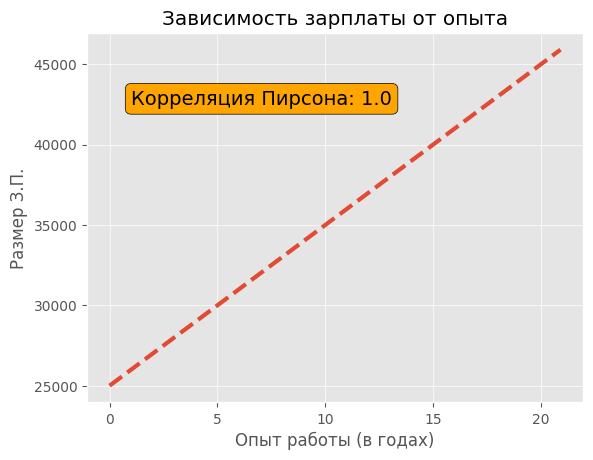

In [35]:
plt.plot(experience, salary, linewidth=3, linestyle='--')

plt.text(1, 42_500, f'Корреляция Пирсона: {corr.statistic}', fontsize=14,
        bbox=dict(facecolor='orange', edgecolor='black', boxstyle='round')) # {'facecolor':'orange', 'edgecolor':'black'...}

plt.xlabel('Опыт работы (в годах)')
plt.ylabel('Размер З.П.')
plt.title('Зависимость зарплаты от опыта')

plt.show()

# 2. A/B test
На соревнования в деревню "Спортивная" приехали спортсмены из деревень "Пирсоново" и "Спирманово". Даны две выборки: рост приехавших спортсменов из каждой деревни. 

## 2.1
Дан файл `task2_data.csv` с информацией о росте спорстменов из каждой деревни. Прочитайе файл и создайте два вектора: рост спортсменов из одной деревни и из другой.

In [36]:
%%timeit

pears = []
spearm = []

with open('./data/task2_data.csv', 'r', encoding='utf8') as file:
    file.readline()
    for line in file:
        line = line.strip().split(';')
        if not line:
            continue
        pears.append(float(line[0]))
        spearm.append(float(line[1]))
        
pears = np.array(pears)
spearm = np.array(spearm)



249 µs ± 21.6 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [37]:
pears = np.array(pears)
spearm = np.array(spearm)
type(pears)

numpy.ndarray

In [38]:
%%timeit

pears = np.zeros(50)
spearm = np.zeros(50)

with open('./data/task2_data.csv', 'r', encoding='utf8') as file:
    file.readline()
    for i, line in enumerate(file):
        line = line.strip().split(';')
        if not line:
            continue
        pears[i] = float(line[0])
        spearm[i] = float(line[1])
        

254 µs ± 12.2 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [39]:
pears

array([190.48629116, 172.54681898, 183.33517857, 178.77548317,
       170.80309984, 187.01508775, 184.11680123, 174.00941624,
       166.54098313, 154.54258209, 162.12385362, 180.81758404,
       176.31597023, 170.96207629, 188.69969606, 191.03383852,
       183.74747568, 205.09261702, 180.80337562, 186.88201263,
       179.66146542, 173.90211394, 199.26949811, 165.51217661,
       197.1002678 , 189.71631812, 192.45430538, 177.27170405,
       177.61261536, 190.62675966, 179.13266486, 161.40696796,
       169.32688532, 177.56130139, 192.67179668, 175.85219622,
       179.4690005 , 194.6483165 , 204.61765013, 172.708628  ,
       190.35253682, 161.77075917, 190.21288648, 197.64520361,
       172.80096667, 191.62105948, 176.90581081, 172.74070339,
       185.41930209, 202.03336023])

In [40]:
spearm

array([181.02712908, 188.02077908, 185.31762828, 180.78237057,
       209.80056389, 182.71392771, 187.25221888, 196.06845222,
       198.2638769 , 174.60316592, 188.96734777, 165.19957095,
       194.88377707, 193.71924844, 172.20198546, 193.45195949,
       191.87727956, 191.9708884 , 179.3966712 , 188.17556661,
       200.86011161, 177.17928821, 200.41211156, 190.29186541,
       177.26256146, 187.72803834, 183.67625561, 164.51446074,
       181.01753715, 214.02776431, 173.31770448, 196.88281622,
       177.27416926, 189.2487919 , 201.04140022, 208.16845295,
       187.85755586, 210.54381875, 208.90355578, 190.27453399,
       170.09579262, 186.50206973, 172.22817595, 202.70969042,
       182.05652604, 203.15384275, 186.74341619, 184.15028322,
       180.5819796 , 199.8308989 ])

## 2.2
Постройте гистограмму роста спортсменов каждой деревни на двух разных картинках (`plt.hist`)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


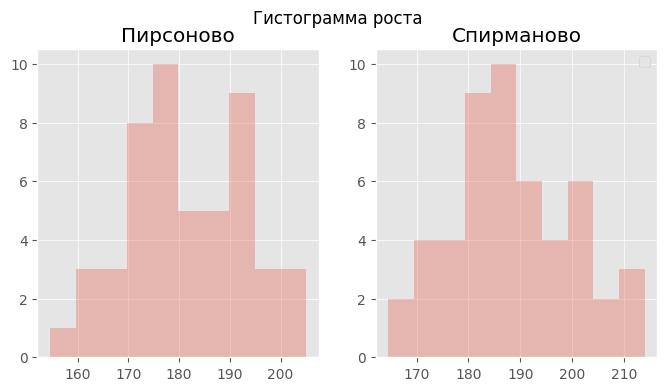

In [41]:
fig, ax = plt.subplots(1, 2, figsize=(8, 4))

ax[0].hist(pears, bins=10, alpha=0.3)
ax[0].set_title('Пирсоново')

ax[1].hist(spearm, bins=10, alpha=0.3)
ax[1].set_title('Спирманово')

plt.suptitle('Гистограмма роста')

plt.legend()

plt.show()

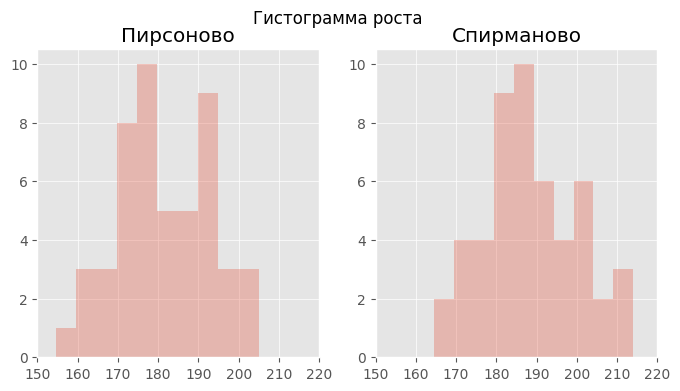

In [42]:
fig, ax = plt.subplots(1, 2, figsize=(8, 4))

ax[0].hist(pears, bins=10, alpha=0.3)
ax[0].set_title('Пирсоново')
ax[0].set_xticks(np.arange(150, 221, 10))

ax[1].hist(spearm, bins=10, alpha=0.3)
ax[1].set_title('Спирманово')
ax[1].set_xticks(np.arange(150, 221, 10))

plt.suptitle('Гистограмма роста')

plt.show()

## 2.3
Постройте гистограмму роста спорстменов из двух деревень на одной картинке (две гистограммы на одном холсте)

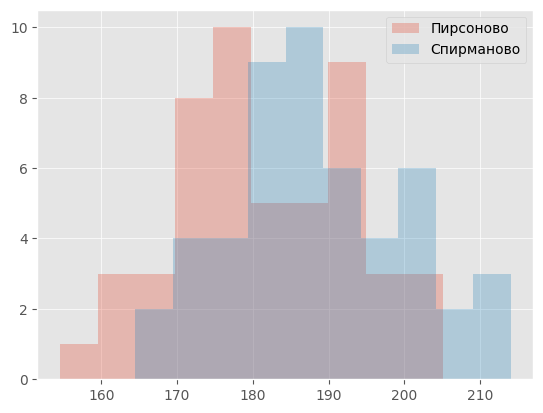

In [43]:
plt.hist(pears, bins=10, alpha=0.3, label='Пирсоново')
plt.hist(spearm, bins=10, alpha=0.3, label='Спирманово')

plt.legend()

plt.show()

## 2.4
Было выдвинуто предположение о том, что средний рост людей в двух деревнях отличается. Давайте попробуем по имеющейся у нас выборке оценить, правда ли это.  

Определите разницу средних двух выборок. 

* Можно ли по этой разнице что-то утверждать?  
* Какие проблемы могут быть, которые делают нашу оценку несостоятельной?

In [44]:
spearm.mean()

188.6445975344185

In [45]:
spearm.mean() - pears.mean()

7.0310882824144585

## 2.5 (делайте пункты отдельно)
Представим, что имеющиеся у нас выборки более менее отраают реальную ситуацию в деревнях.  
Давайте проделаем следующую симуляцию (1000 раз сделайте одно и то же):
* Из каждой выборке (то есть из набора спортсменов каждой деревни) получите выборку того же размера с помощью отбора с повторением (т.е. из вектора ИКС нужно с помощью отбора с повторением получить новый вектор такой же размерности). Сделать это можно с помощью `np.random.choice`
* У нас есть два новых вектора (один получили из выборки одной деревни, другой -- из другой). Найдите разницу средних для этих векторов и сохраните эту разницу в какой-нибудь массив.
* Если повторить операции выше 1000 раз, то мы имеем 1000 разностей средних ростов, то есть уже не 1 оценку, а некоторое распределение. Для этого распределения постройте гистограмму.
* А теперь на этой гистограмме отметьте исходную разницу между средними с помощью `plt.axvline`
* Куда попала наша исходная точечная оценка? Что это может значить?

In [46]:
size = 1000
diff = np.empty(size)

for i in range(1000):
    pears_bootstrap = np.random.choice(pears, 50)
    spearm_bootstrap = np.random.choice(spearm, 50)
    diff[i] = spearm_bootstrap.mean() - pears_bootstrap.mean()

diff.shape

(1000,)

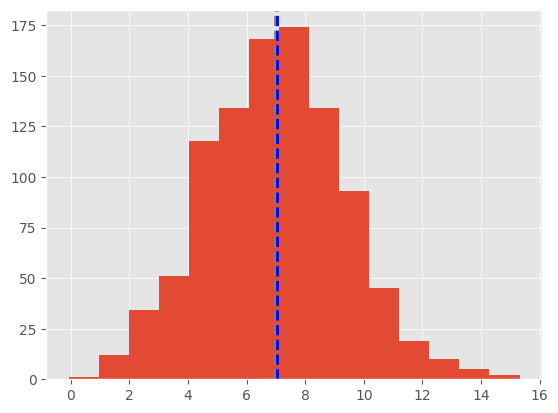

In [47]:
plt.hist(diff, bins=15)
plt.axvline(diff.mean(), linestyle='--', color='gray', label='MEAN DIFF')
plt.axvline(spearm.mean() - pears.mean(), linestyle='--', color='blue', label='INITIAL DIFF')

plt.show()

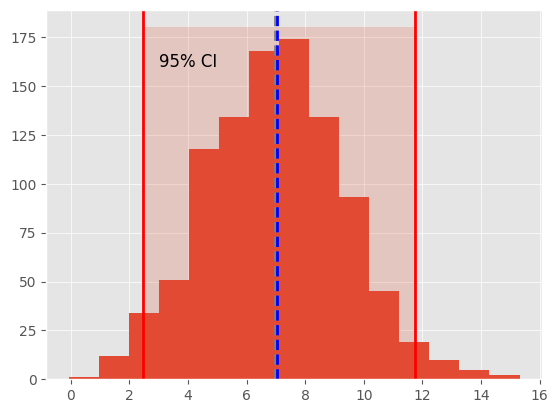

In [49]:
left, right = np.quantile(diff, [0.025, 0.975])
plt.hist(diff, bins=15)
plt.axvline(diff.mean(), linestyle='--', color='gray', label='MEAN DIFF')
plt.axvline(spearm.mean() - pears.mean(), linestyle='--', color='blue', label='INITIAL DIFF')
plt.axvline(left, color='red')
plt.axvline(right, color='red')
plt.fill_betweenx([0, 180], left, right, alpha=0.2)
plt.text(3, 160, "95% CI", fontsize=12)

plt.show()

$ H_0: \mu_s - \mu_p  = 0 $

$ H_a: \mu_s - \mu_p  \neq 0 $

In [54]:
np.quantile(diff, [0.025, 0.975])

array([ 2.47487958, 11.74717218])

In [55]:
np.quantile(diff, [0.005, 0.995])

array([ 1.36928679, 13.60396407])